<a href="https://colab.research.google.com/github/JUANCARLOST-LAB/MNIST-Digits/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries

import tensorflow
from tensorflow import keras

In [3]:
# Load data

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Shape of data
X_train_full.shape

(60000, 28, 28)

In [5]:
# Divide train_full into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42, stratify = y_train_full)

In [8]:
# Check values of pixels
import numpy as np
np.max(X_train[0])

254

We will divide all values by 255 to normaliz

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

In [10]:
# Build Neural Network
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
# Compile model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [21]:
# Fit data into model
history = model.fit(X_train, y_train, epochs = 8, validation_data = (X_valid, y_valid))

Epoch 1/8
1407/1407 [==============================] - 13s 9ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.1125 - val_accuracy: 0.9755
Epoch 2/8
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.1090 - val_accuracy: 0.9771
Epoch 3/8
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.1085 - val_accuracy: 0.9769
Epoch 4/8
1407/1407 [==============================] - 22s 15ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.1473 - val_accuracy: 0.9722
Epoch 5/8
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.1239 - val_accuracy: 0.9766
Epoch 6/8
1407/1407 [==============================] - 9s 6ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.1341 - val_accuracy: 0.9765
Epoch 7/8
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.1305 - val_accurac

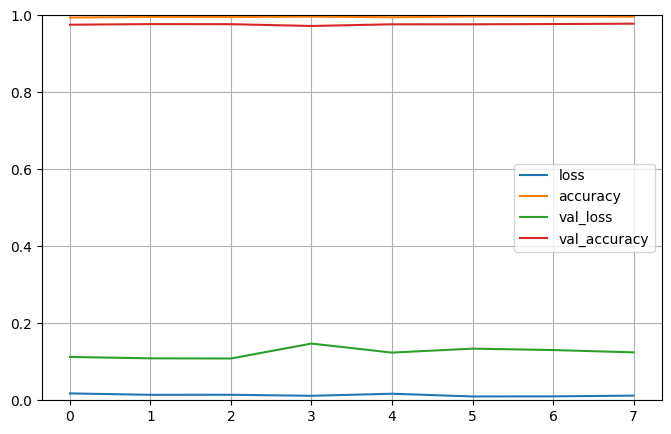

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
acc = model.evaluate(X_test, y_test)
print(f'Accuracy over test set: {acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1148 - accuracy: 0.9807
Accuracy over test set: [0.11483420431613922, 0.9807000160217285]


Prediction in 6 images from test set

In [46]:
import numpy as np

X_new = X_test[:6]
y_preds = np.argmax(model.predict(X_new), axis = 1)
y_preds

1/1 [==============================] - 0s 38ms/step


array([7, 2, 1, 0, 4, 1])

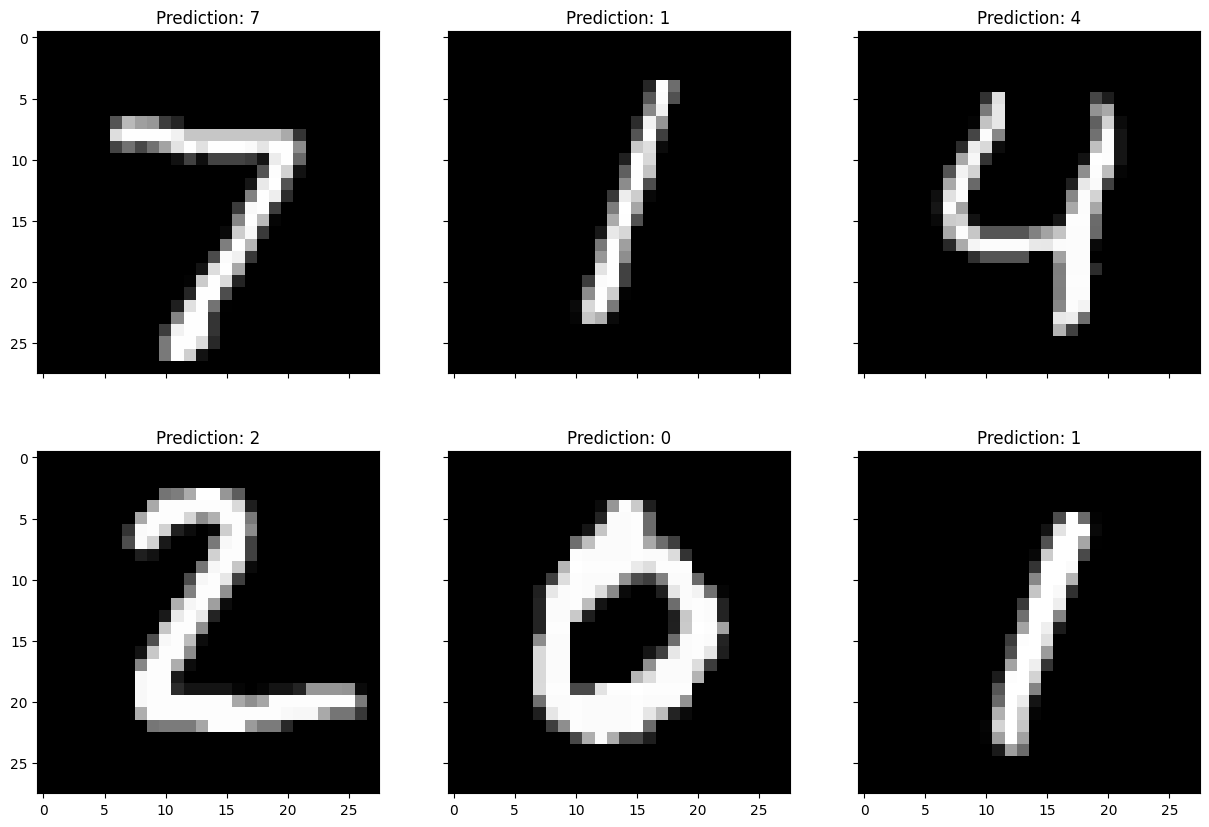

In [72]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 2, ncols = 3, sharex = True, sharey = True, figsize = (15, 10))

counter = 0

for i in range(3):
  for j in range(2):
    axs[j, i].imshow(X_new[counter], cmap = 'gray')
    axs[j, i].set_title(f'Prediction: {y_preds[counter]}')
    counter = counter + 1